# 1. Exploración y Preprocesamiento de Datos (EDA)

Se realiza un análisis exploratorio del dataset, identificando problemas de calidad,
outliers y observaciones relevantes. Para su análisis en Power BI.


## 1.1 Importación de librerías

Se utilizan librerías estándar para análisis de datos:
- **pandas**: manejo de dataframes
- **numpy**: operaciones numéricas
- **matplotlib / seaborn**: visualización

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1.2 Carga de datos

Se carga el dataset marketing_raw.csv que contiene información de clientes,
sus características demográficas, comportamiento de compra y respuesta a campañas.


In [33]:
path = "../Data/"
data = "marketing_raw.csv"
df_mark = pd.read_csv(f"{path}{data}", sep=",")


In [34]:
df_mark.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,$58138,0,0,58,$635,$88,$546,$172,$88,$88,...,0,0,0,0,1,0,0,$1529,1441,0
1,$46344,1,1,38,$11,$1,$6,$2,$1,$6,...,0,0,0,0,1,0,0,$21,15,0
2,$71613,0,0,26,$426,$49,$127,$111,$21,$42,...,1,0,0,0,1,0,0,$734,692,0
3,$26646,1,0,26,$11,$4,$20,$10,$3,$5,...,1,0,0,0,1,0,0,$48,43,0
4,$58293,1,0,94,$173,$43,$118,$46,$27,$15,...,0,0,0,0,0,0,1,$407,392,0


## 1.3 Exploración inicial

Se revisa la estructura del dataset:
- Tipos de datos
- Valores nulos
- Estadísticas básicas


In [35]:
df_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Income                2205 non-null   object
 1   Kidhome               2205 non-null   int64 
 2   Teenhome              2205 non-null   int64 
 3   Recency               2205 non-null   int64 
 4   MntWines              2205 non-null   object
 5   MntFruits             2205 non-null   object
 6   MntMeatProducts       2205 non-null   object
 7   MntFishProducts       2205 non-null   object
 8   MntSweetProducts      2205 non-null   object
 9   MntGoldProds          2205 non-null   object
 10  NumDealsPurchases     2205 non-null   int64 
 11  NumWebPurchases       2205 non-null   int64 
 12  NumCatalogPurchases   2205 non-null   int64 
 13  NumStorePurchases     2205 non-null   int64 
 14  NumWebVisitsMonth     2205 non-null   int64 
 15  AcceptedCmp3          2205 non-null   

In [36]:
df_mark.describe(include="all")

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205,2205.000000,2205.000000,2205.000000,2205,2205,2205,2205,2205,2205,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205,2205.000000,2205.00000
unique,1963,NaN,NaN,NaN,775,158,551,182,176,212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,897,NaN,NaN
top,$7500,NaN,NaN,NaN,$2,$0,$7,$0,$0,$3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$39,NaN,NaN
freq,12,NaN,NaN,NaN,41,393,53,379,411,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN
mean,NaN,0.442177,0.506576,49.009070,NaN,NaN,NaN,NaN,NaN,NaN,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,NaN,518.707483,0.29932
std,NaN,0.537132,0.544380,28.932111,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,NaN,553.847248,0.68044
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-283.000000,0.00000
25%,NaN,0.000000,0.000000,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,42.000000,0.00000
50%,NaN,0.000000,0.000000,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,288.000000,0.00000
75%,NaN,1.000000,1.000000,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,884.000000,0.00000


## 1.5 Valores nulos y duplicados

Se identifican columnas con valores faltantes y registros duplicados.


In [37]:
df_mark.isnull().sum()


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [38]:
df_mark.duplicated().sum()

184

## 1.6 Limpieza de columnas numéricas guardadas como texto

Se eliminan símbolos `$` y se convierten las columnas de ingreso y gasto a formato numérico.

In [39]:
# Eliminar símbolo $ y convertir Income a numérico
df_mark["Income"] = df_mark["Income"].replace('[\$,]', '', regex=True).astype(float)

In [40]:
df_mark.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,$635,$88,$546,$172,$88,$88,...,0,0,0,0,1,0,0,$1529,1441,0
1,46344.0,1,1,38,$11,$1,$6,$2,$1,$6,...,0,0,0,0,1,0,0,$21,15,0
2,71613.0,0,0,26,$426,$49,$127,$111,$21,$42,...,1,0,0,0,1,0,0,$734,692,0
3,26646.0,1,0,26,$11,$4,$20,$10,$3,$5,...,1,0,0,0,1,0,0,$48,43,0
4,58293.0,1,0,94,$173,$43,$118,$46,$27,$15,...,0,0,0,0,0,0,1,$407,392,0


In [41]:
mnt_gasto = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","MntTotal"]
for col in mnt_gasto:
    df_mark[col] = df_mark[col].replace('[\$,]', '', regex=True).astype(float)
# basicamente hacemos lo mismo que en la primera, pero con un ciclo para no hacerlo una por una 

In [42]:
# verificamos el resultado
# Todos los valores numericos ya han sido convertidos 
df_mark.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                float64
MntFruits               float64
MntMeatProducts         float64
MntFishProducts         float64
MntSweetProducts        float64
MntGoldProds            float64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

## 1.7 Outliers en edades

Se visualizan las edades para detectar valores extremos:
- Presencia de valores inválidos como `99999`.
- Distribución general entre jóvenes y adultos.


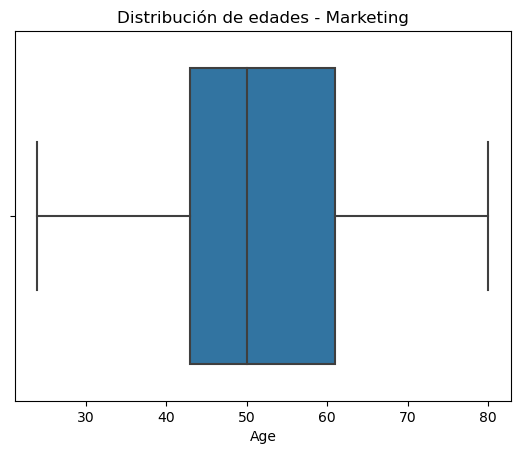

count    2205.000000
mean       51.095692
std        11.705801
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

In [44]:
sns.boxplot(x=df_mark["Age"])
plt.title("Distribución de edades - Marketing")
plt.show()

df_mark["Age"].describe()


- Income y montos de gasto guardados como texto con `$`.
- Edad con valores inválidos (`99999`). # Aunque esto no lo visualice y se puede ver con anterioridad que la edad maxima es 80
- Variables categóricas dispersas en columnas binarias. en este caso seria las columnas mencionadas adelante


## ESTO es LITERAL C 
(Estas son las variables que mencione que eran dispersas en formato binario)
Se crean nuevas columnas:
- **Marital_Status** a partir de marital_*.c 
- **Education** a partir de education_*.
